In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv(r"C:\Users\manso\OneDrive\Desktop\Data Science Course\credit cap.csv")

In [3]:
dataset.head()

,ID,Gender,Risk,Age_bracket,Education,Previous_claim,Claims
0,2,female,Risk Level 04,50+,Bachelors,0,claim
1,9,male,Risk Level 03,50+,Masters,0,claim
2,12,female,Risk Level 03,31-50,Doctorate,0,claim
3,15,female,Risk Level 02,18-30,Masters,1,claim
4,16,female,Risk Level 04,18-30,High School,1,claim


In [4]:
dataset.tail()

,ID,Gender,Risk,Age_bracket,Education,Previous_claim,Claims
995,995,female,Risk Level 02,31-50,Bachelors,0,no_claim
996,996,female,Risk Level 03,31-50,Masters,0,no_claim
997,997,male,Risk Level 01,18-30,Doctorate,1,no_claim
998,999,female,Risk Level 01,50+,High School,0,no_claim
999,1000,male,Risk Level 03,18-30,Diploma,1,no_claim


In [5]:
X = dataset.drop(['Claims','ID'], axis = 1)
Y = dataset['Claims']

In [6]:
X

,Gender,Risk,Age_bracket,Education,Previous_claim
0,female,Risk Level 04,50+,Bachelors,0
1,male,Risk Level 03,50+,Masters,0
2,female,Risk Level 03,31-50,Doctorate,0
3,female,Risk Level 02,18-30,Masters,1
4,female,Risk Level 04,18-30,High School,1
...,...,...,...,...,...
995,female,Risk Level 02,31-50,Bachelors,0
996,female,Risk Level 03,31-50,Masters,0
997,male,Risk Level 01,18-30,Doctorate,1
998,female,Risk Level 01,50+,High School,0


In [7]:
Y

0         claim
1         claim
2         claim
3         claim
4         claim
         ...   
995    no_claim
996    no_claim
997    no_claim
998    no_claim
999    no_claim
Name: Claims, Length: 1000, dtype: object

In [8]:
le = preprocessing.LabelEncoder()
dataset = dataset.apply(le.fit_transform)

In [9]:
X = dataset.drop(['Claims','ID'], axis = 1)
Y = dataset['Claims']

In [10]:
print(X)

     Gender  Risk  Age_bracket  Education  Previous_claim
0         0     3            2          0               0
1         1     2            2          4               0
2         0     2            1          2               0
3         0     1            0          4               1
4         0     3            0          3               1
..      ...   ...          ...        ...             ...
995       0     1            1          0               0
996       0     2            1          4               0
997       1     0            0          2               1
998       0     0            2          3               0
999       1     2            0          1               1

[1000 rows x 5 columns]


In [11]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Claims, Length: 1000, dtype: int32


In [12]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [13]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# Split the dataset train and test to build regression model

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns

In [15]:
tree_model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)

In [16]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the decision tree', (accuracy_score(Y_test, tree_pred)))

-----------Accuracy Score-----------
Accuracy score of the decision tree 0.795


In [17]:
print('-----------F1 Score-----------')
print('F1 score of the decision tree', (f1_score(Y_test, tree_pred)))

-----------F1 Score-----------
F1 score of the decision tree 0.8776119402985074


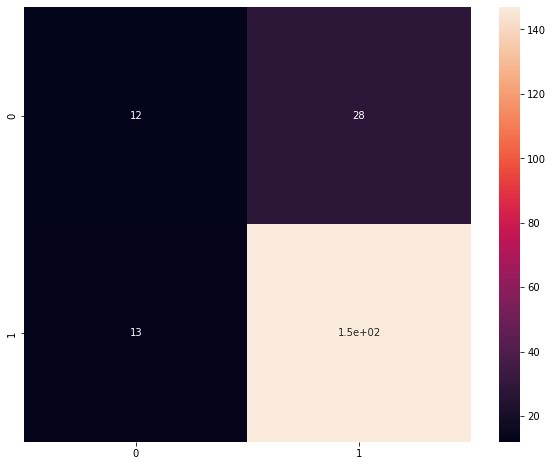

In [18]:
cm = confusion_matrix(Y_test, tree_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()

In [19]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the decision tree :- \n', (classification_report(Y_test, tree_pred)))

-----------Classification Report-----------
Confusion Matrix of the decision tree :- 
               precision    recall  f1-score   support

           0       0.48      0.30      0.37        40
           1       0.84      0.92      0.88       160

    accuracy                           0.80       200
   macro avg       0.66      0.61      0.62       200
weighted avg       0.77      0.80      0.78       200



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

In [22]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Logistic Regression', (accuracy_score(Y_test, lr_pred)))

-----------Accuracy Score-----------
Accuracy score of the Logistic Regression 0.83


In [23]:
print('-----------F1 Score-----------')
print('F1 score of the logistic regression', (f1_score(Y_test, lr_pred)))

-----------F1 Score-----------
F1 score of the logistic regression 0.9028571428571428


In [24]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the logistic regression :- \n', (confusion_matrix(Y_test, lr_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the logistic regression :- 
 [[  8  32]
 [  2 158]]


In [25]:
print('logistic Regression classification :-\n',(classification_report(Y_test, lr_pred)))


logistic Regression classification :-
               precision    recall  f1-score   support

           0       0.80      0.20      0.32        40
           1       0.83      0.99      0.90       160

    accuracy                           0.83       200
   macro avg       0.82      0.59      0.61       200
weighted avg       0.83      0.83      0.79       200



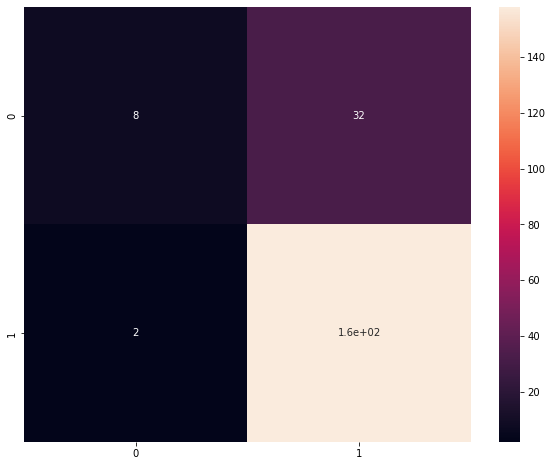

In [26]:
cm = confusion_matrix(Y_test, lr_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()

# RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

In [29]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Random Forest', (accuracy_score(Y_test, rf_pred)))

-----------Accuracy Score-----------
Accuracy score of the Random Forest 0.735


In [30]:
print('-----------F1 Score-----------')
print('F1 score of the random forest', (f1_score(Y_test, rf_pred)))

-----------F1 Score-----------
F1 score of the random forest 0.8328075709779179


In [31]:
print('-----------Confusion Matrix-----------')
print('Confusion Matrix of the random forest :- \n', (confusion_matrix(Y_test, rf_pred)))

-----------Confusion Matrix-----------
Confusion Matrix of the random forest :- 
 [[ 15  25]
 [ 28 132]]


In [32]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the random forest :- \n', (classification_report(Y_test, rf_pred)))

-----------Classification Report-----------
Confusion Matrix of the random forest :- 
               precision    recall  f1-score   support

           0       0.35      0.38      0.36        40
           1       0.84      0.82      0.83       160

    accuracy                           0.73       200
   macro avg       0.59      0.60      0.60       200
weighted avg       0.74      0.73      0.74       200



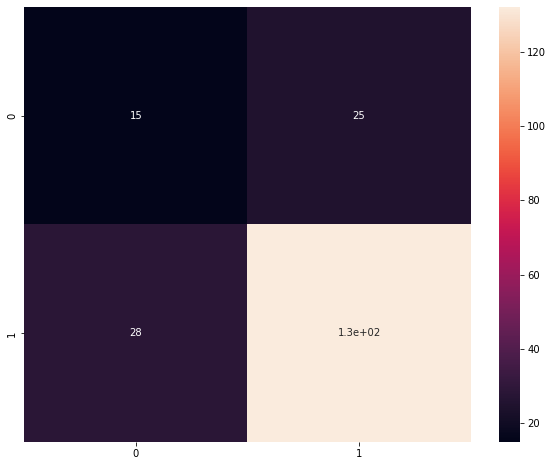

In [33]:
cm = confusion_matrix(Y_test, rf_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()

# Removing Gender column 

In [34]:
X1 = dataset.drop(['Claims','ID','Gender'], axis = 1)
Y1 = dataset['Claims']

In [35]:
#from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2, random_state=0)

In [36]:
tree_model = DecisionTreeClassifier(max_depth=6, criterion='entropy')
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)

In [37]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Logistic Regression', (accuracy_score(Y_test, tree_pred)))

-----------Accuracy Score-----------
Accuracy score of the Logistic Regression 0.8


In [38]:
print('-----------F1 Score-----------')
print('F1 score of the decision tree', (f1_score(Y_test, tree_pred)))

-----------F1 Score-----------
F1 score of the decision tree 0.8816568047337279


In [39]:
print('-----------Classification Report-----------')
print('Confusion Matrix of the random forest :- \n', (classification_report(Y_test, tree_pred)))

-----------Classification Report-----------
Confusion Matrix of the random forest :- 
               precision    recall  f1-score   support

           0       0.50      0.28      0.35        40
           1       0.84      0.93      0.88       160

    accuracy                           0.80       200
   macro avg       0.67      0.60      0.62       200
weighted avg       0.77      0.80      0.78       200



In [40]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

In [41]:
print('-----------Accuracy Score-----------')
print('Accuracy score of the Logistic Regression', (accuracy_score(Y_test, lr_pred)))

-----------Accuracy Score-----------
Accuracy score of the Logistic Regression 0.825


In [42]:
print('-----------F1 Score-----------')
print('F1 score of the logistic regression', (f1_score(Y_test, lr_pred)))

-----------F1 Score-----------
F1 score of the logistic regression 0.8997134670487106


In [43]:
print('logistic Regression classification :-\n',(classification_report(Y_test, lr_pred)))

logistic Regression classification :-
               precision    recall  f1-score   support

           0       0.73      0.20      0.31        40
           1       0.83      0.98      0.90       160

    accuracy                           0.82       200
   macro avg       0.78      0.59      0.61       200
weighted avg       0.81      0.82      0.78       200

